In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# 经济统计实训

1. 实训一 熟悉统计学中的基本概念 
2. 实训二 调查方案、问卷的设计 、统计调查（忽略）
3. 实训三 统计资料的整理 
4. 实训四 利用各种静态指标进行对比分析 
5. 实训五 水平、速度指标的运用、趋势分析 （忽略）
6. 实训六 利用指数体系解决实际问题 （忽略）
7. 实训七 利用抽样调查进行总体指标的推断 （忽略）
8. 实训八 利用相关与回归分析现象之间的关系（忽略）

数据地址：https://github.com/JackTroy/JupyterNotebook/tree/master/EconomicStatisticsProject/Data

数据如下，3个表

In [243]:
#载入数据
national_gdp = pd.read_csv('Data/全国生产总值数据.csv')
provinces_gdp = pd.read_csv('Data/国内生产总值分省份.csv',index_col=0).iloc[:,1:]
provinces_per_capita_gdp = pd.read_csv('Data/人均国内总产值分省份.csv',index_col=0).iloc[:,1:]
provinces_industries_gdp = pd.read_csv('Data/第一二三产业产值分省份.csv', index_col=0)
provinces_1st_industry_gdp = provinces_industries_gdp.iloc[:,1:32]
provinces_2nd_industry_gdp = provinces_industries_gdp.iloc[:,33:64]
provinces_3rd_industry_gdp = provinces_industries_gdp.iloc[:,65:96]
#provinces_gdp["全国"] = provinces_gdp.sum(1)
#provinces_1st_industry_gdp["全国"] = provinces_1st_industry_gdp.sum(1)
#provinces_2nd_industry_gdp["全国"] = provinces_2nd_industry_gdp.sum(1)
#provinces_3rd_industry_gdp["全国"] = provinces_3rd_industry_gdp.sum(1)

全国生产总值数据

In [66]:
national_gdp

,,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,国民总收入（亿元）,217246.6,268631.0,318736.7,345046.4,407137.8,479576.1,532872.1,583196.7,634043.4,682635.1
1,人均国内总产值（元）,16602.0,20337.0,23912.0,25963.0,30567.0,36018.0,39544.0,43320.0,46629.0,49992.0
2,国内生产总值（亿元）,217656.6,268019.4,316751.7,345629.2,408903.0,484123.5,534123.0,588018.8,636138.7,685505.8
3,第一产业（亿元）,23313.0,27783.0,32747.0,34154.0,39354.6,46153.3,50892.7,55321.7,58336.1,60870.5
4,第二产业（亿元）,103163.5,125145.4,148097.9,157850.1,188804.9,223390.3,240200.4,256810.0,271764.5,280560.3
5,第三产业（亿元）（注2）,91180.1,115090.9,135906.9,153625.1,180743.4,214579.9,243030.0,275887.0,306038.2,344075.0
6,第一产业所占比重（国内生产总值=100）,10.7,10.4,10.3,9.9,9.6,9.5,9.5,9.4,9.2,8.9
7,第二产业所占比重（国内生产总值=100）,47.4,46.7,46.8,45.7,46.2,46.1,45.0,43.7,42.7,40.9
8,第三产业所占比重（国内生产总值=100）,41.9,42.9,42.9,44.4,44.2,44.3,45.5,46.9,48.1,50.2


国内生产总值分省份（单位亿元）

In [74]:
provinces_gdp

,北京,天津,河北,山西,内蒙古,辽宁,吉林,黑龙江,上海,江苏,...,重庆,四川,贵州,云南,西藏,陕西,甘肃,青海,宁夏,新疆
2006,8117.78,4462.74,11467.60,4878.61,4944.25,9304.52,4275.12,6211.80,10572.24,21742.05,...,3907.23,8690.24,2338.98,3988.14,290.76,4743.61,2276.70,648.50,725.90,3045.26
2007,9846.81,5252.76,13607.32,6024.45,6423.18,11164.30,5284.69,7104.00,12494.01,26018.48,...,4676.13,10562.39,2884.11,4772.52,341.43,5757.29,2702.40,797.35,919.11,3523.16
2008,11115.00,6719.01,16011.97,7315.40,8496.20,13668.58,6426.10,8314.37,14069.87,30981.98,...,5793.66,12601.23,3561.56,5692.12,394.85,7314.58,3166.82,1018.62,1203.92,4183.21
2009,12153.03,7521.85,17235.48,7358.31,9740.25,15212.49,7278.75,8587.00,15046.45,34457.30,...,6530.01,14151.28,3912.68,6169.75,441.36,8169.80,3387.56,1081.27,1353.31,4277.05
2010,14113.58,9224.46,20394.26,9200.86,11672.00,18457.27,8667.58,10368.60,17165.98,41425.48,...,7925.58,17185.48,4602.16,7224.18,507.46,10123.48,4120.75,1350.43,1689.65,5437.47
2011,16251.93,11307.28,24515.76,11237.55,14359.88,22226.70,10568.83,12582.00,19195.69,49110.27,...,10011.37,21026.68,5701.84,8893.12,605.83,12512.30,5020.37,1670.44,2102.21,6610.05
2012,17879.40,12893.88,26575.01,12112.83,15880.58,24846.43,11939.24,13691.58,20181.72,54058.22,...,11409.60,23872.80,6852.20,10309.47,701.03,14453.68,5650.20,1893.54,2341.29,7505.31
2013,19800.81,14442.01,28442.95,12665.25,16916.50,27213.22,13046.40,14454.91,21818.15,59753.37,...,12783.26,26392.07,8086.86,11832.31,815.67,16205.45,6330.69,2122.06,2577.57,8443.84
2014,21330.83,15726.93,29421.15,12761.49,17770.19,28626.58,13803.14,15039.38,23567.70,65088.32,...,14262.60,28536.66,9266.39,12814.59,920.83,17689.94,6836.82,2303.32,2752.10,9273.46
2015,23014.59,16538.19,29806.11,12766.49,17831.51,28669.02,14063.13,15083.67,25123.45,70116.38,...,15717.27,30053.10,10502.56,13619.17,1026.39,18021.86,6790.32,2417.05,2911.77,9324.80


人均国内总产值分省份(单位元)

In [75]:
provinces_per_capita_gdp

,北京,天津,河北,山西,内蒙古,辽宁,吉林,黑龙江,上海,江苏,...,重庆,四川,贵州,云南,西藏,陕西,甘肃,青海,宁夏,新疆
2006,50467,41163.00,16962,14123.00,20053.00,21788.00,15720,16195.00,57695.00,28814,...,12316,10546,5787.00,8970,10430,12138,8757.00,11762,11846.66,15000
2007,58204,46122.00,19877,16945.00,25393.00,25729.00,19383,18478.00,66367.00,33928,...,14660,12893,6915.00,10540,12109,14607,10346.00,14257,14649.00,16999
2008,63029,55473.00,23239,20398.00,32214.00,31259.00,23514,21727.00,73124.00,39622,...,18025,15378,8824.00,12587,13861,18246,12110.00,17389,17892.00,19893
2009,70452,62574.00,24581,21522.00,40282.00,35239.00,26595,22447.00,78989.00,44744,...,22920,17339,10309.00,13539,15295,21688,12872.00,19454,21777.00,19942
2010,73856,72994.00,28668,26283.00,47347.00,42355.00,31599,27076.00,76074.00,52840,...,27596,21182,13119.00,15752,17027,27133,16113.00,24115,26860.00,25034
2011,81658,85213.00,33969,31357.00,57974.00,50760.00,38460,32819.00,82560.00,62290,...,34500,26133,16413.00,19265,20077,33464,19595.00,29522,33043.00,30087
2012,87475,93173.00,36584,33628.00,63886.00,56649.00,43415,35711.00,85373.00,68347,...,38914,29608,19710.00,22195,22936,38564,21978.00,33181,36394.00,33796
2013,94648,100105.00,38909,34984.00,67836.00,61996.00,47428,37697.00,90993.00,75354,...,43223,32617,23151.00,25322,26326,43117,24539.00,36875,39613.00,37553
2014,99995,105231.00,39984,35070.00,71046.00,65201.00,50160,39226.00,97370.00,81874,...,47850,35128,26437.00,27264,29252,46929,26433.00,39671,41834.00,40648
2015,106497,107960.09,40255,34918.71,71100.54,65354.41,51086,39461.56,103795.54,87995,...,52321,36775,29847.25,28806,31999,47626,26165.26,41252,43805.00,40036


第一产业增加值分省份（单位亿元）

In [76]:
provinces_1st_industry_gdp

,北京,天津,河北,山西,内蒙古,辽宁,吉林,黑龙江,上海,江苏,...,重庆,四川,贵州,云南,西藏,陕西,甘肃,青海,宁夏,新疆
2006,98.04,118.23,1606.48,276.77,649.62,976.37,672.76,737.59,93.80,1545.01,...,425.81,1595.48,393.17,749.81,50.90,488.48,333.35,69.64,79.54,527.80
2007,101.26,110.19,1804.72,269.68,762.10,1133.40,783.80,915.38,101.84,1816.24,...,482.39,2032.00,446.38,837.35,54.89,592.63,385.97,83.41,97.89,628.72
2008,112.81,122.58,2034.60,302.48,906.98,1302.00,916.70,1089.10,111.80,2100.00,...,575.40,2366.15,547.85,1020.94,60.51,753.72,463.00,105.58,120.00,691.10
2009,118.29,128.85,2207.34,477.59,929.60,1414.90,980.57,1154.33,113.82,2261.86,...,606.80,2240.61,550.27,1067.60,63.88,789.64,497.05,107.40,127.25,759.74
2010,124.36,145.58,2562.81,554.48,1095.28,1631.08,1050.15,1302.90,114.15,2540.10,...,685.38,2482.89,625.03,1108.38,68.72,988.45,599.28,134.92,159.29,1078.63
2011,136.27,159.72,2905.73,641.42,1306.30,1915.57,1277.44,1701.50,124.94,3064.77,...,844.52,2983.51,726.22,1411.01,74.47,1220.90,678.75,155.08,184.14,1139.03
2012,150.20,171.60,3186.66,698.32,1448.58,2155.82,1412.11,2113.66,127.80,3418.29,...,940.01,3297.21,891.91,1654.55,80.38,1370.16,780.50,176.91,199.40,1320.57
2013,161.83,188.45,3500.42,773.81,1599.41,2321.63,1509.34,2516.79,129.28,3646.08,...,1016.74,3425.61,1029.05,1895.34,86.82,1526.05,879.37,207.59,222.98,1468.29
2014,158.99,199.90,3447.46,788.89,1627.85,2285.75,1524.01,2611.36,124.26,3634.33,...,1061.03,3531.05,1280.45,1990.07,91.64,1564.94,900.76,215.93,216.99,1538.60
2015,140.21,208.82,3439.45,783.16,1617.42,2384.03,1596.28,2633.50,109.82,3986.05,...,1150.15,3677.30,1640.61,2055.78,98.04,1597.63,954.09,208.93,237.76,1559.08


第二产业增加值分省份（单位亿元）

In [77]:
provinces_2nd_industry_gdp

,北京.1,天津.1,河北.1,山西.1,内蒙古.1,辽宁.1,吉林.1,黑龙江.1,上海.1,江苏.1,...,重庆.1,四川.1,贵州.1,云南.1,西藏.1,陕西.1,甘肃.1,青海.1,宁夏.1,新疆.1
2006,2191.43,2488.29,6115.01,2748.33,2327.44,4729.50,1915.29,3365.31,5028.37,12250.84,...,1500.97,3775.19,980.78,1712.60,80.10,2440.50,1043.19,331.16,349.83,1459.30
2007,2509.40,2892.53,7241.80,3438.58,3154.56,5853.10,2475.45,3695.58,5678.51,14306.40,...,1892.10,4641.30,1148.27,2051.08,98.48,2964.56,1279.32,417.78,451.82,1647.55
2008,2693.15,3821.07,8777.42,4265.77,4271.03,7512.11,3064.63,4365.90,6235.92,16663.81,...,2433.27,5790.10,1408.71,2451.09,115.76,3842.08,1471.43,529.40,581.24,2086.74
2009,2855.55,3987.84,8959.83,3993.80,5114.00,7906.34,3541.92,4060.72,6001.78,18566.37,...,3448.77,6711.87,1476.62,2582.53,136.63,4236.42,1527.24,575.33,662.32,1929.59
2010,3388.38,4840.23,10707.68,5234.00,6367.69,9976.82,4506.31,5204.11,7218.32,21753.93,...,4359.12,8672.18,1800.06,3223.49,163.92,5446.10,1984.97,744.63,827.91,2592.15
2011,3752.48,5928.32,13126.86,6635.26,8037.69,12152.15,5611.48,6330.53,7927.89,25203.28,...,5543.04,11029.13,2194.33,3780.32,208.79,6935.59,2377.83,975.18,1056.15,3225.90
2012,4059.27,6663.82,14003.57,6731.56,8801.50,13230.49,6376.77,6037.61,7854.77,27121.95,...,5975.18,12333.28,2677.54,4419.20,242.85,8073.87,2600.09,1092.34,1159.37,3481.56
2013,4352.30,7276.68,14762.10,6792.68,9084.19,14269.46,6858.23,5918.22,8027.77,29094.03,...,6397.92,13579.03,3243.70,4927.82,292.92,8911.64,2821.04,1204.31,1264.96,3765.97
2014,4544.80,7731.85,15012.85,6293.91,9119.79,14384.64,7286.59,5544.41,8167.71,30854.50,...,6529.06,13962.41,3857.44,5281.82,336.84,9577.24,2926.45,1234.31,1341.24,3948.96
2015,4542.64,7704.22,14386.87,5194.27,9000.58,13041.97,7005.71,4798.08,7991.00,32044.45,...,7069.37,13248.08,4147.83,5416.12,376.19,9082.13,2494.77,1207.31,1379.60,3596.40


第三产业增加值分省份（单位亿元）

In [78]:
provinces_3rd_industry_gdp

,北京.2,天津.2,河北.2,山西.2,内蒙古.2,辽宁.2,吉林.2,黑龙江.2,上海.2,江苏.2,...,重庆.2,四川.2,贵州.2,云南.2,西藏.2,陕西.2,甘肃.2,青海.2,宁夏.2,新疆.2
2006,5580.81,1752.63,3938.94,1727.44,1814.42,3545.28,1687.07,2086.00,5244.20,7849.23,...,1564.79,3267.14,908.05,1544.31,160.01,1594.76,900.16,240.78,281.39,1058.16
2007,6742.66,2047.68,4662.98,2025.09,2174.46,4036.99,2025.44,2454.04,6408.50,9618.52,...,1748.02,3832.00,1147.25,1852.88,188.82,1908.60,1037.11,282.42,339.49,1246.89
2008,7682.07,2410.73,5376.59,2370.48,2583.79,4647.46,2442.73,2855.00,7350.43,11548.80,...,2087.99,4350.00,1376.84,2228.07,219.64,2255.52,1241.68,326.55,397.27,1425.57
2009,9179.19,3405.16,6068.31,2886.92,3696.65,5891.25,2756.26,3371.95,8930.85,13629.07,...,2474.44,5198.80,1885.79,2519.62,240.85,3143.74,1363.27,398.54,563.74,1587.72
2010,10600.84,4238.65,7123.77,3412.38,4209.02,6849.37,3111.12,3861.59,9833.51,17131.45,...,2881.08,6030.41,2177.07,2892.31,274.82,3688.93,1536.50,470.88,702.45,1766.69
2011,12363.18,5219.24,8483.17,3960.87,5015.89,8158.98,3679.91,4549.97,11142.86,20842.21,...,3623.81,7014.04,2781.29,3701.79,322.57,4355.81,1963.79,540.18,861.92,2245.12
2012,13669.93,6058.46,9384.78,4682.95,5630.50,9460.12,4150.36,5540.31,12199.15,23517.98,...,4494.41,8242.31,3282.75,4235.72,377.80,5009.65,2269.61,624.29,982.52,2703.18
2013,14986.43,6905.03,10038.89,5035.75,6148.78,10486.56,4613.89,5947.92,13445.07,26421.64,...,5242.03,9256.13,3734.04,4897.75,427.93,5607.52,2567.60,689.15,1077.12,3125.98
2014,16627.04,7795.18,10960.84,5678.69,7022.55,11956.19,4992.54,6883.61,15275.72,30599.49,...,6672.51,11043.20,4128.50,5542.70,492.35,6547.76,3009.61,853.08,1193.87,3785.90
2015,18331.74,8625.15,11979.79,6789.06,7213.51,13243.02,5461.14,7652.09,17022.63,34085.88,...,7497.75,13127.72,4714.12,6147.27,552.16,7342.10,3341.46,1000.81,1294.41,4169.32


## 实训一 
无计算，对应数据写基本概念就行

## 实训三

1.写一下数据的品质标志分组, 计算略

2.数量标志分组，对2015年国内生产总值分省份（单位亿元）进行分组，计算如下

In [144]:
#原数据
provinces_gdp.loc[2015]

北京     23014.59
天津     16538.19
河北     29806.11
山西     12766.49
内蒙古    17831.51
辽宁     28669.02
吉林     14063.13
黑龙江    15083.67
上海     25123.45
江苏     70116.38
浙江     42886.49
安徽     22005.63
福建     25979.82
江西     16723.78
山东     63002.33
河南     37002.16
湖北     29550.19
湖南     28902.21
广东     72812.55
广西     16803.12
海南      3702.76
重庆     15717.27
四川     30053.10
贵州     10502.56
云南     13619.17
西藏      1026.39
陕西     18021.86
甘肃      6790.32
青海      2417.05
宁夏      2911.77
新疆      9324.80
Name: 2015, dtype: float64

In [131]:
upper_bound = provinces_gdp.loc[2015].max()
lower_bound = provinces_gdp.loc[2015].min()

In [142]:
print(upper_bound, lower_bound, (upper_bound - lower_bound) / 8)

72812.55 1026.39 8973.27


下界定为1000,上界定为73000，组数8，组距离为8973，各组数量为6 11 4 5 2 0 1 2，下面是直方图

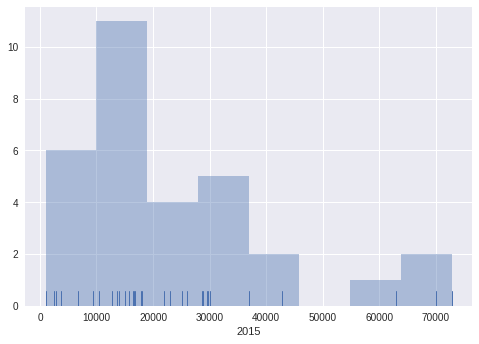

In [141]:
sns.distplot(provinces_gdp.loc[2015], kde=False, rug=True);

## 实训四 利用各种静态指标进行对比分析

1.总量指标，使用国民生产总值

具体数值如下

In [150]:
national_gdp.iloc[0]

        国民总收入（亿元）
2006       217247
2007       268631
2008       318737
2009       345046
2010       407138
2011       479576
2012       532872
2013       583197
2014       634043
2015       682635
Name: 0, dtype: object

图

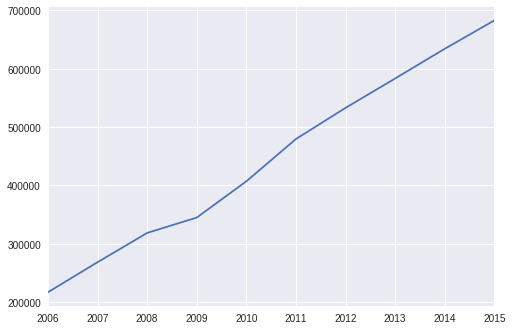

In [165]:
national_gdp.iloc[0][1:].plot()

2.相对指标 各省生产值占总gdp比例

In [251]:
provinces_gdp_proportion = (provinces_gdp.T / provinces_gdp.sum(1)).T * 100

In [252]:
provinces_gdp_proportion

,北京,天津,河北,山西,内蒙古,辽宁,吉林,黑龙江,上海,江苏,...,重庆,四川,贵州,云南,西藏,陕西,甘肃,青海,宁夏,新疆
2006,3.486789,1.916858,4.925621,2.095485,2.123679,3.996524,1.836271,2.668123,4.541041,9.338754,...,1.678253,3.732675,1.004650,1.713006,0.124889,2.037499,0.977900,0.278547,0.311792,1.308015
2007,3.520033,1.877754,4.864339,2.153618,2.296156,3.991009,1.889169,2.539535,4.466353,9.301075,...,1.671621,3.775838,1.031010,1.706078,0.122054,2.058113,0.966053,0.285036,0.328563,1.259458
2008,3.334694,2.015820,4.803870,2.194748,2.549008,4.100812,1.927942,2.494456,4.221206,9.295134,...,1.738199,3.780589,1.068530,1.707735,0.118462,2.194502,0.950101,0.305604,0.361197,1.255036
2009,3.326829,2.059068,4.718124,2.014299,2.666343,4.164341,1.992520,2.350647,4.118888,9.432508,...,1.787557,3.873840,1.071076,1.688937,0.120820,2.236441,0.927327,0.295992,0.370462,1.170820
2010,3.229342,2.110658,4.666430,2.105258,2.670682,4.223226,1.983237,2.372449,3.927764,9.478604,...,1.813460,3.932226,1.053025,1.652972,0.116112,2.316363,0.942873,0.308993,0.386610,1.244153
2011,3.116734,2.168467,4.701540,2.155095,2.753883,4.262552,2.026850,2.412928,3.681277,9.418181,...,1.919943,4.032417,1.093477,1.705489,0.116184,2.399561,0.962788,0.320351,0.403154,1.267650
2012,3.101091,2.236378,4.609301,2.100909,2.754406,4.309488,2.070801,2.374735,3.500417,9.376125,...,1.978937,4.140616,1.188479,1.788125,0.121590,2.506918,0.979999,0.328425,0.406085,1.301758
2013,3.121456,2.276680,4.483828,1.996586,2.666765,4.289969,2.056672,2.278713,3.439475,9.419691,...,2.015189,4.160521,1.274836,1.865279,0.128585,2.554673,0.997988,0.334528,0.406335,1.331111
2014,3.116950,2.298085,4.299142,1.864762,2.596654,4.183036,2.016973,2.197617,3.443811,9.510978,...,2.084111,4.169896,1.354044,1.872521,0.134556,2.584928,0.999025,0.336571,0.402148,1.355077
2015,3.184230,2.288174,4.123884,1.766333,2.467114,3.966560,1.945733,2.086931,3.476005,9.701093,...,2.174594,4.158057,1.453103,1.884308,0.142008,2.493451,0.939488,0.334416,0.402864,1.290151


下图是gdp占比的趋势图，红线是北京，蓝线是天津，绿线是河北

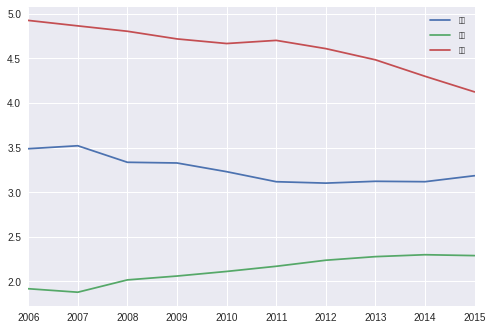

In [258]:
provinces_gdp_proportion.iloc[:,0:3].plot()

3.平均指标 使用人均国内总产值

In [167]:
national_gdp.loc[1]

        人均国内总产值（元）
2006         16602
2007         20337
2008         23912
2009         25963
2010         30567
2011         36018
2012         39544
2013         43320
2014         46629
2015         49992
Name: 1, dtype: object

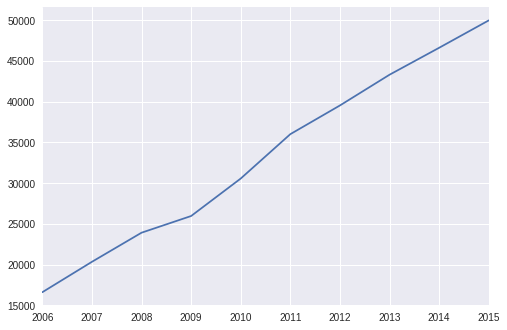

In [168]:
national_gdp.loc[1][1:].plot()

4.变异度指标 使用各省份生产总值

4.1 全距

In [260]:
max_gdp = provinces_gdp.max(1)
min_gdp = provinces_gdp.min(1)

每年的全距如下

In [264]:
max_gdp - min_gdp

2006    26297.00
2007    31435.58
2008    36401.86
2009    39041.20
2010    45505.60
2011    52604.45
2012    56366.89
2013    61659.12
2014    66889.02
2015    71786.16
dtype: float64

全距作图如下

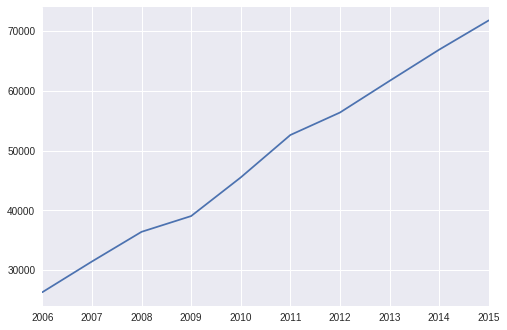

In [265]:
(max_gdp - min_gdp).plot()

4.2 标准差

如下是每年各省份生产总值标准差

In [273]:
provinces_gdp.var(1).apply(np.sqrt)

2006     6430.328831
2007     7647.313244
2008     8938.409217
2009     9730.402201
2010    11401.345497
2011    13216.286212
2012    14325.987925
2013    15709.737307
2014    16987.708913
2015    18218.964847
dtype: float64

将以上数据作图

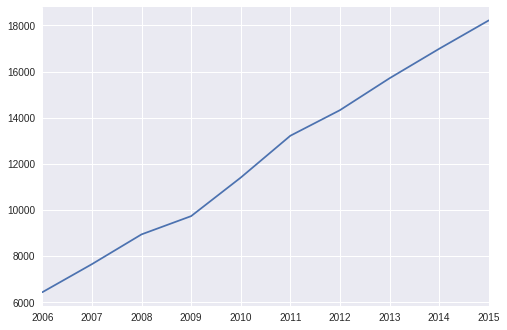

In [274]:
provinces_gdp.var(1).apply(np.sqrt).plot()